## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  27.946434  1370.110031  0.012707  5.281143  0.512005
1  55.155377  1337.491224  0.610405  7.846903  1.685239
2  25.718307   128.076434  0.507494  1.974082  1.409598
3  98.745852   533.033476  0.114871  7.544961  0.606156
4  90.631598   884.568807  0.374686  8.908837  1.256472


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9271766	total: 56ms	remaining: 55.9s
1:	learn: 0.9178192	total: 56.6ms	remaining: 28.2s
2:	learn: 0.9092573	total: 57.1ms	remaining: 19s
3:	learn: 0.9010308	total: 57.7ms	remaining: 14.4s
4:	learn: 0.8921401	total: 58.1ms	remaining: 11.6s
5:	learn: 0.8837632	total: 58.5ms	remaining: 9.7s
6:	learn: 0.8753168	total: 59ms	remaining: 8.37s
7:	learn: 0.8669641	total: 59.5ms	remaining: 7.37s
8:	learn: 0.8595328	total: 59.9ms	remaining: 6.59s
9:	learn: 0.8498643	total: 60.4ms	remaining: 5.98s
10:	learn: 0.8431111	total: 60.9ms	remaining: 5.47s
11:	learn: 0.8349522	total: 61.4ms	remaining: 5.06s
12:	learn: 0.8272967	total: 62ms	remaining: 4.71s
13:	learn: 0.8197107	total: 62.5ms	remaining: 4.4s
14:	learn: 0.8111019	total: 63ms	remaining: 4.14s
15:	learn: 0.8040276	total: 63.3ms	remaining: 3.9s
16:	learn: 0.7954875	total: 63.8ms	remaining: 3.69s
17:	learn: 0.7890584	total: 64.2ms	remaining: 3.5s
18:	learn: 0.7832364	total: 64.6ms	remaining: 3.34s
19:	le

113:	learn: 0.3823805	total: 105ms	remaining: 815ms
114:	learn: 0.3805374	total: 105ms	remaining: 811ms
115:	learn: 0.3783119	total: 106ms	remaining: 808ms
116:	learn: 0.3758570	total: 107ms	remaining: 804ms
117:	learn: 0.3738877	total: 107ms	remaining: 801ms
118:	learn: 0.3717269	total: 108ms	remaining: 798ms
119:	learn: 0.3696990	total: 108ms	remaining: 794ms
120:	learn: 0.3673006	total: 109ms	remaining: 789ms
121:	learn: 0.3647213	total: 109ms	remaining: 785ms
122:	learn: 0.3633807	total: 110ms	remaining: 782ms
123:	learn: 0.3610286	total: 110ms	remaining: 778ms
124:	learn: 0.3586805	total: 111ms	remaining: 774ms
125:	learn: 0.3570500	total: 111ms	remaining: 771ms
126:	learn: 0.3546105	total: 112ms	remaining: 767ms
127:	learn: 0.3528049	total: 112ms	remaining: 763ms
128:	learn: 0.3506834	total: 112ms	remaining: 758ms
129:	learn: 0.3483844	total: 113ms	remaining: 755ms
130:	learn: 0.3467183	total: 113ms	remaining: 751ms
131:	learn: 0.3449759	total: 114ms	remaining: 747ms
132:	learn: 

295:	learn: 0.1786863	total: 185ms	remaining: 440ms
296:	learn: 0.1779207	total: 186ms	remaining: 440ms
297:	learn: 0.1774820	total: 186ms	remaining: 438ms
298:	learn: 0.1769933	total: 186ms	remaining: 437ms
299:	learn: 0.1767104	total: 187ms	remaining: 436ms
300:	learn: 0.1764306	total: 187ms	remaining: 435ms
301:	learn: 0.1757203	total: 188ms	remaining: 434ms
302:	learn: 0.1749516	total: 188ms	remaining: 433ms
303:	learn: 0.1740701	total: 189ms	remaining: 432ms
304:	learn: 0.1737226	total: 189ms	remaining: 431ms
305:	learn: 0.1730281	total: 190ms	remaining: 430ms
306:	learn: 0.1720222	total: 190ms	remaining: 429ms
307:	learn: 0.1717561	total: 191ms	remaining: 428ms
308:	learn: 0.1713885	total: 191ms	remaining: 427ms
309:	learn: 0.1707941	total: 191ms	remaining: 426ms
310:	learn: 0.1704548	total: 192ms	remaining: 425ms
311:	learn: 0.1700491	total: 192ms	remaining: 424ms
312:	learn: 0.1697298	total: 193ms	remaining: 423ms
313:	learn: 0.1694990	total: 193ms	remaining: 422ms
314:	learn: 

531:	learn: 0.0882116	total: 287ms	remaining: 253ms
532:	learn: 0.0879494	total: 288ms	remaining: 252ms
533:	learn: 0.0877339	total: 289ms	remaining: 252ms
534:	learn: 0.0876691	total: 289ms	remaining: 251ms
535:	learn: 0.0874512	total: 290ms	remaining: 251ms
536:	learn: 0.0873993	total: 290ms	remaining: 250ms
537:	learn: 0.0873361	total: 291ms	remaining: 250ms
538:	learn: 0.0870808	total: 291ms	remaining: 249ms
539:	learn: 0.0867013	total: 292ms	remaining: 249ms
540:	learn: 0.0864509	total: 292ms	remaining: 248ms
541:	learn: 0.0862408	total: 293ms	remaining: 247ms
542:	learn: 0.0860190	total: 293ms	remaining: 247ms
543:	learn: 0.0859690	total: 294ms	remaining: 246ms
544:	learn: 0.0856883	total: 294ms	remaining: 246ms
545:	learn: 0.0852171	total: 295ms	remaining: 245ms
546:	learn: 0.0849983	total: 295ms	remaining: 244ms
547:	learn: 0.0849511	total: 295ms	remaining: 244ms
548:	learn: 0.0846790	total: 296ms	remaining: 243ms
549:	learn: 0.0842196	total: 296ms	remaining: 242ms
550:	learn: 

711:	learn: 0.0611828	total: 368ms	remaining: 149ms
712:	learn: 0.0611499	total: 368ms	remaining: 148ms
713:	learn: 0.0611174	total: 369ms	remaining: 148ms
714:	learn: 0.0608596	total: 369ms	remaining: 147ms
715:	learn: 0.0607837	total: 370ms	remaining: 147ms
716:	learn: 0.0606361	total: 370ms	remaining: 146ms
717:	learn: 0.0603849	total: 370ms	remaining: 145ms
718:	learn: 0.0603531	total: 371ms	remaining: 145ms
719:	learn: 0.0600463	total: 371ms	remaining: 144ms
720:	learn: 0.0598013	total: 371ms	remaining: 144ms
721:	learn: 0.0595031	total: 372ms	remaining: 143ms
722:	learn: 0.0594264	total: 372ms	remaining: 143ms
723:	learn: 0.0593509	total: 372ms	remaining: 142ms
724:	learn: 0.0593141	total: 373ms	remaining: 141ms
725:	learn: 0.0591415	total: 373ms	remaining: 141ms
726:	learn: 0.0591052	total: 374ms	remaining: 140ms
727:	learn: 0.0588151	total: 374ms	remaining: 140ms
728:	learn: 0.0587585	total: 375ms	remaining: 139ms
729:	learn: 0.0584750	total: 375ms	remaining: 139ms
730:	learn: 

951:	learn: 0.0342344	total: 469ms	remaining: 23.7ms
952:	learn: 0.0341231	total: 470ms	remaining: 23.2ms
953:	learn: 0.0340408	total: 471ms	remaining: 22.7ms
954:	learn: 0.0339320	total: 471ms	remaining: 22.2ms
955:	learn: 0.0338480	total: 472ms	remaining: 21.7ms
956:	learn: 0.0337546	total: 473ms	remaining: 21.2ms
957:	learn: 0.0336638	total: 473ms	remaining: 20.7ms
958:	learn: 0.0335793	total: 474ms	remaining: 20.3ms
959:	learn: 0.0334882	total: 474ms	remaining: 19.8ms
960:	learn: 0.0334247	total: 475ms	remaining: 19.3ms
961:	learn: 0.0333355	total: 476ms	remaining: 18.8ms
962:	learn: 0.0332545	total: 476ms	remaining: 18.3ms
963:	learn: 0.0331078	total: 476ms	remaining: 17.8ms
964:	learn: 0.0330611	total: 477ms	remaining: 17.3ms
965:	learn: 0.0330150	total: 477ms	remaining: 16.8ms
966:	learn: 0.0329695	total: 478ms	remaining: 16.3ms
967:	learn: 0.0328821	total: 478ms	remaining: 15.8ms
968:	learn: 0.0328077	total: 478ms	remaining: 15.3ms
969:	learn: 0.0327221	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

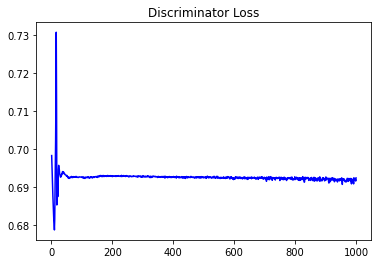

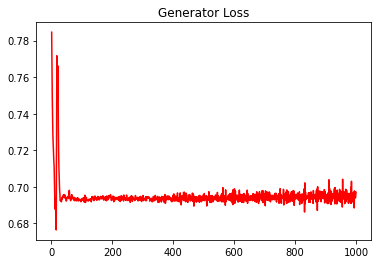

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4641602163752715


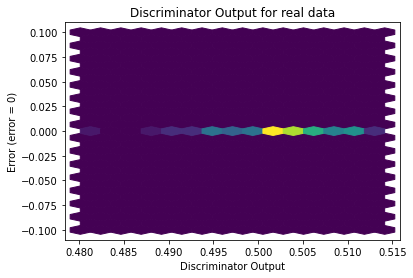

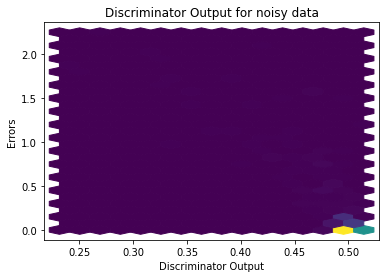

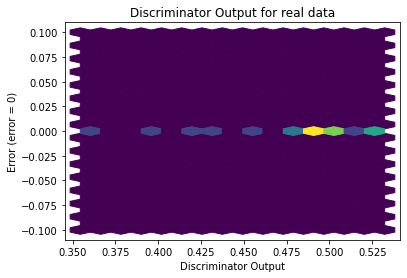

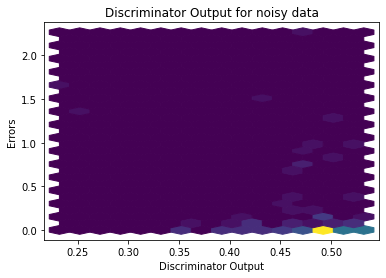

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


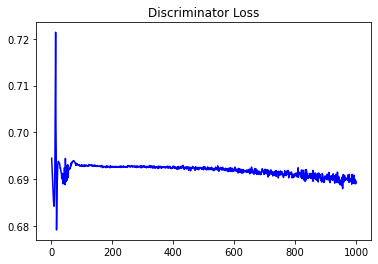

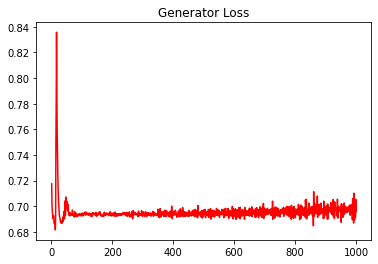

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4692643122106653


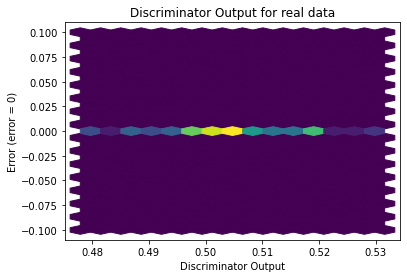

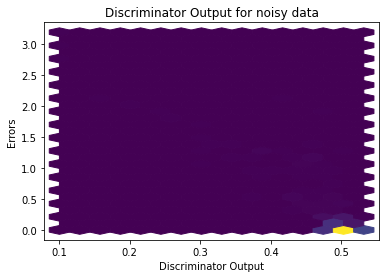

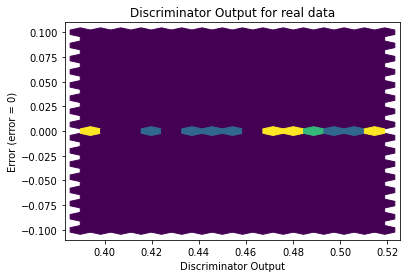

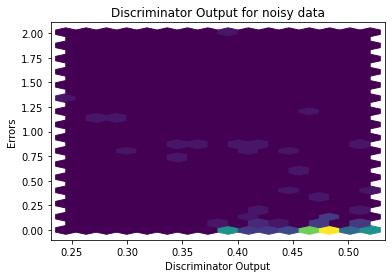

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4940]], requires_grad=True)
